<a href="https://colab.research.google.com/github/moonjune/test-repo/blob/master/knlp_kaggle_BoW_prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#참고:  텐서플로와 머신러닝으로 시작하는 자연어 처리
!pip install kaggle
from google.colab import files
files.upload()

In [8]:
import os
os.chdir('/content')
!ls -1ha kaggle.json

kaggle.json


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
!git clone https://github.com/NLP-kr/tensorflow-ml-nlp.git
import os
os.chdir('/content/tensorflow-ml-nlp')
!pip install -r requirements.txt


Cloning into 'tensorflow-ml-nlp'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 842 (delta 30), reused 27 (delta 15), pack-reused 778
Receiving objects: 100% (842/842), 160.14 MiB | 23.74 MiB/s, done.
Resolving deltas: 100% (497/497), done.
Checking out files: 100% (100/100), done.
     |████████████████████████████████| 19.4MB 4.9MB/s 
     |████████████████████████████████| 174kB 44.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/0e/2b/e8/c0b818ac4b3d35104d35e48cdc7afe27fc06ea277feed2831a
Successfully built JPype1


In [12]:
!mkdir -p /content/kaggle_bag_of_word
os.chdir('/content/kaggle_bag_of_word')
!kaggle competitions download -c word2vec-nlp-tutorial

sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
unlabeledTrainData.tsv.zip: Skipping, found more recently modified local copy (use --force to force download)
testData.tsv.zip: Skipping, found more recently modified local copy (use --force to force download)
labeledTrainData.tsv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [13]:
!ls

labeledTrainData.tsv.zip  testData.tsv.zip
sampleSubmission.csv	  unlabeledTrainData.tsv.zip


In [0]:
import zipfile

In [0]:
DATA_IN_PATH = '/content/kaggle_bag_of_word/'

file_list = ['labeledTrainData.tsv.zip','unlabeledTrainData.tsv.zip', 'testData.tsv.zip']

for file in file_list:
  zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
  zipRef.extractall(DATA_IN_PATH)
  zipRef.close()
             

In [16]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline # 그래프를 주피터 노트북에서 바로 그리도록 함

UsageError: unrecognized arguments: # 그래프를 주피터 노트북에서 바로 그리도록 함


In [0]:
train_data = pd.read_csv(DATA_IN_PATH+"labeledTrainData.tsv", header = 0, delimiter = "\t", quoting = 3)

In [18]:
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [19]:
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
  if 'tsv' in file and 'zip' not in file:
    print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
testData.tsv                  32.72MB
labeledTrainData.tsv          33.56MB
unlabeledTrainData.tsv        67.28MB


In [20]:
print('전체 학습 데이터의 개수: {}'.format(len(train_data)))

전체 학습 데이터의 개수: 25000


In [21]:
train_length = train_data['review'].apply(len)
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

Text(0, 0.5, 'Number of review')

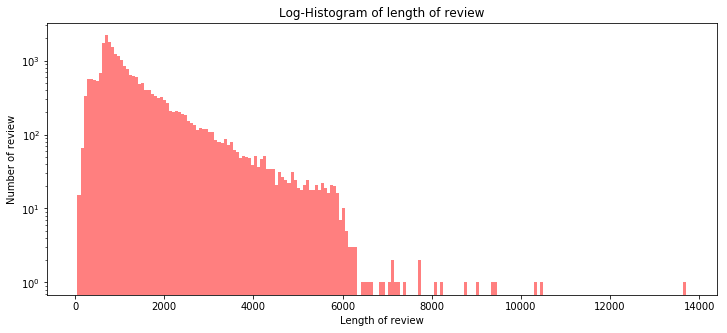

In [22]:
# 그래프에 대한 이미지 크기 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))

# 히스토그램 선언
# bins: 히스토그램 값에 대한 버킷 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_length, bins = 200, alpha = 0.5, color = 'r', label = 'word')
plt.yscale('log', nonposy = 'clip')
# 그래프 제목
plt.title('Log-Histogram of length of review')
# 그래프 x축 라벨
plt.xlabel('Length of review')
# 그래프 y축 라벨
plt.ylabel('Number of review')

In [23]:
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))

print('리뷰 길이 1사분위값: {:.0f}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))
print('리뷰 길이 3사분위값: {}'.format(np.percentile(train_length, 75)))



리뷰 길이 최댓값: 13710
리뷰 길이 최솟값: 54
리뷰 길이 평균값: 1329.71
리뷰 길이 표준편차: 1005.22
리뷰 길이 1사분위값: 705
리뷰 길이 중간값: 983.0
리뷰 길이 3사분위값: 1619.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f20c0db9358>],
 'caps': [<matplotlib.lines.Line2D at 0x7f20c0db9be0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f20c0dbf908>],
 'means': [<matplotlib.lines.Line2D at 0x7f20c0dbf5f8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f20c0dbf2b0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f20c0db9550>,
  <matplotlib.lines.Line2D at 0x7f20c0db9898>]}

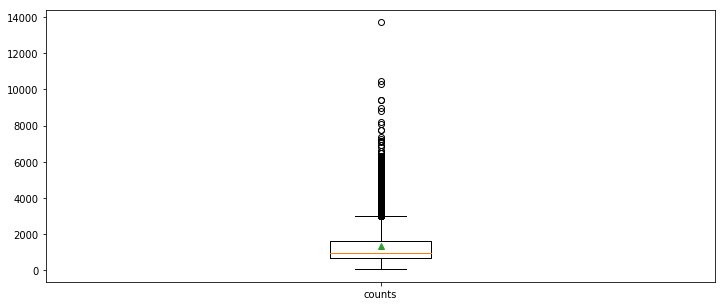

In [24]:
plt.figure(figsize = (12,5))
# 박스 플롯 생성
# 첫 번째 인자: 여러 분포에 대한 데이터 리스트를 입력
# lavels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot(train_length,
           labels = ['counts'],
           showmeans =True)

In [25]:
!pip install wordcloud

(-0.5, 799.5, 599.5, -0.5)

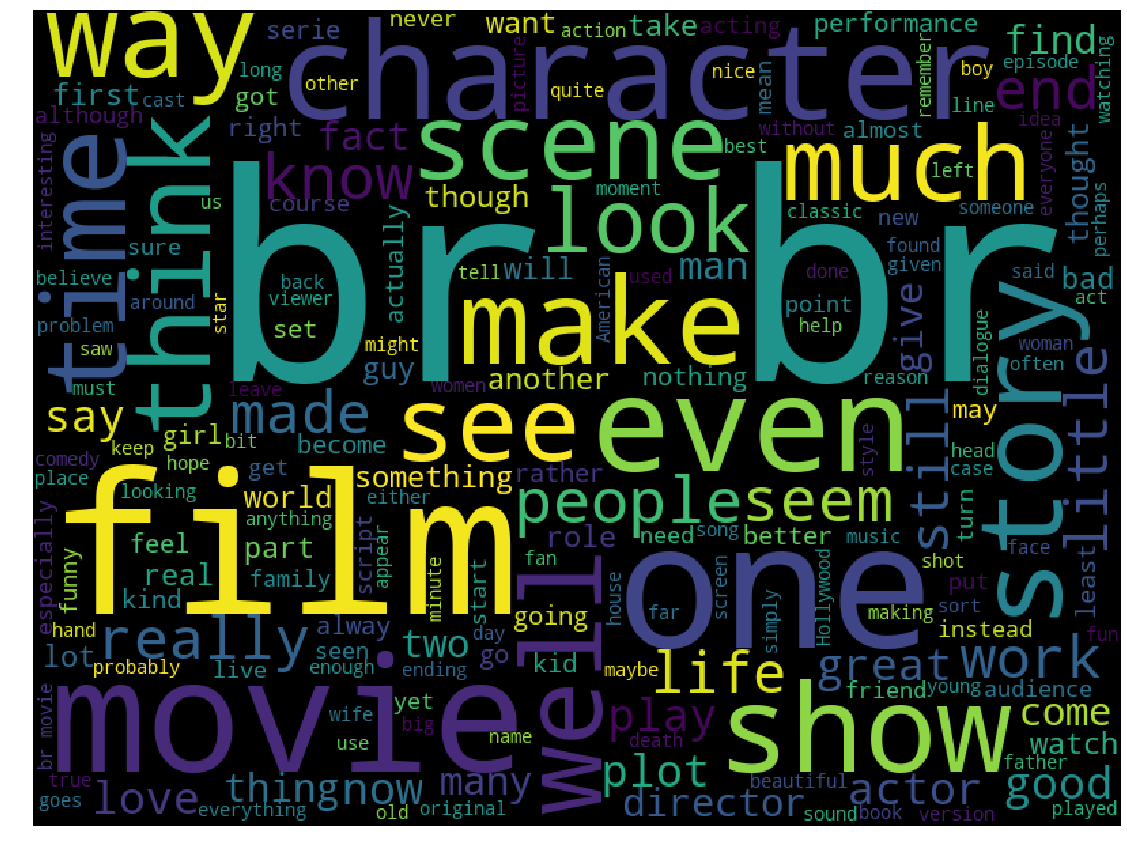

In [33]:
from wordcloud import WordCloud
cloud = WordCloud(width = 800, height = 600).generate(" ".join(train_data['review']))
plt.figure(figsize = (20, 15))
plt.imshow(cloud)
plt.axis('off')

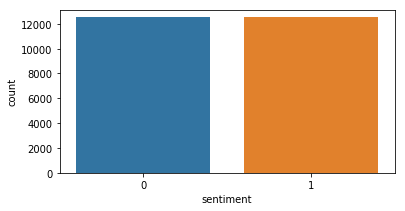

In [26]:
fig, axe = plt.subplots(ncols = 1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['sentiment'])

In [27]:
print("긍정 리뷰 개수: {}".format(train_data['sentiment'].value_counts()[1]))
print("부정 리뷰 개수: {}".format(train_data['sentiment'].value_counts()[0]))

긍정 리뷰 개수: 12500
부정 리뷰 개수: 12500


In [0]:
train_word_counts = train_data['review'].apply(lambda x:len(x.split(' ')))

Text(0, 0.5, 'Number of reviews')

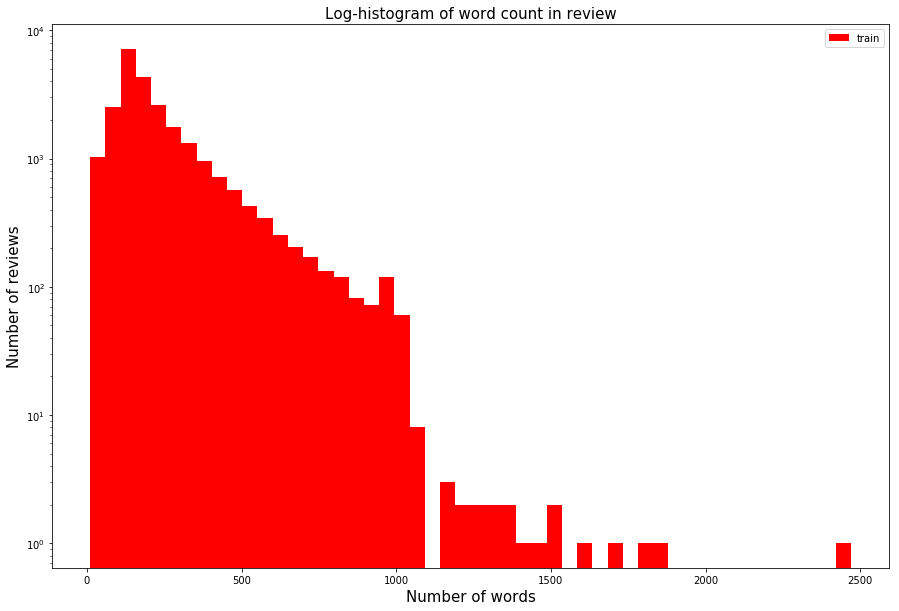

In [29]:
plt.figure(figsize = (15, 10))
plt.hist(train_word_counts, bins = 50, facecolor = 'r', label = 'train')
plt.title('Log-histogram of word count in review', fontsize = 15)
plt.yscale('log', nonposy = 'clip')
plt.legend()
plt.xlabel('Number of words', fontsize = 15)
plt.ylabel('Number of reviews', fontsize = 15)

In [30]:
print('리뷰 길이 최댓값: {}'.format(np.max(train_word_counts)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_word_counts)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_word_counts)))

print('리뷰 길이 1사분위값: {:.0f}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 길이 중간값: {}'.format(np.median(train_word_counts)))
print('리뷰 길이 3사분위값: {}'.format(np.percentile(train_word_counts, 75)))



리뷰 길이 최댓값: 2470
리뷰 길이 최솟값: 10
리뷰 길이 평균값: 233.79
리뷰 길이 표준편차: 173.74
리뷰 길이 1사분위값: 127
리뷰 길이 중간값: 174.0
리뷰 길이 3사분위값: 284.0


In [33]:
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x)) # 문장에 물음표 있음
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x)) 
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper()))
capitals = np.mean(train_data['review'].apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x])))
                  
print('물음표가 있는 질문: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))
print('첫글자가 대문자인 질문: {:.2f}%'.format(capital_first * 100))
print('대문자가 있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가 있는 질문: {:.2f}%'.format(numbers * 100))

물음표가 있는 질문: 29.55%
마침표가 있는 질문: 99.69%
첫글자가 대문자인 질문: 0.00%
대문자가 있는 질문: 99.59%
숫자가 있는 질문: 56.66%


In [0]:
import re
import pandas as pd
import numpy
import json
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

In [0]:
DATA_IN_PATH = '/content/kaggle_bag_of_word/'
train_data = pd.read_csv(DATA_IN_PATH + 'labeledTrainData.tsv',header = 0)
